In [ ]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp
!pip install shapely  ==1.7.0
!pip install --upgrade descartes
!pip install mapclassify==2.3.0 libpysal==4.3.0 splot==1.1.3
!pip install esda
!pip install pysal


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached geopandas-0.8.2-py2.py3-none-any.whl (962 kB)
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.0
    Uninstalling geopandas-0.13.0:
      Successfully uninstalled geopandas-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segregation 2.4.2 requires geopandas>=0.9, but you have geopandas 0.8.2 which is incompatible.
spopt 0.5.0 requires geopandas>=0.10.0, but you have geopandas 0.8.2 which is incompatible.
tobler 0.10 requires geopandas>=0.13, but you have geopandas 0.8.2 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Invalid requirement: '==1.7.0'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mapclassify-2.3.0-py3-none-any.whl (35 kB)
  Using cached libpysal-4.3.0-py2.py3-none-any.whl
  Using cached splot-1.1.3-py3-none-any.whl
  Attempting uninstall: mapclassify
    Found existing installation: mapclassify 2.5.0
    Uninstalling mapclassify-2.5.0:
      Successfully uninstalled mapclassify-2.5.0
  Attempting uninstall: libpysal
    Found existing installation: libpysal 4.7.0
    Uninstalling libpysal-4.7.0:
      Successfully uninstalled libpysal-4.7.0
  Attempting uninstall: splot
    Found existing installation: splot 1.1.5.post1
    Uninstalling splot-1.1.5.post1:
      Successfully uninstalled splot-1.1.5.post1
ERROR: pip's d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached libpysal-4.7.0-py3-none-any.whl (2.4 MB)
  Using cached mapclassify-2.5.0-py3-none-any.whl (39 kB)
  Using cached splot-1.1.5.post1-py3-none-any.whl (39 kB)
  Using cached geopandas-0.13.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: mapclassify
    Found existing installation: mapclassify 2.3.0
    Uninstalling mapclassify-2.3.0:
      Successfully uninstalled mapclassify-2.3.0
  Attempting uninstall: libpysal
    Found existing installation: libpysal 4.3.0
    Uninstalling libpysal-4.3.0:
      Successfully uninstalled libpysal-4.3.0
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.8.2
    Uninstalling geopandas-0.8.2:
      Successfully uninstalled geopandas-0.8.2
  Attempting uninstall: splot
    Found existing installation: splot 1.1.3
 

# Objetivo: Calcular os efeitos das características socioeconômicas e das vizinhanças sobre o roubo de veículos nos setores censitários do Recife.

### Perguntas válidas :


1.   Quais são as características relevantes para o cálculo na base?
2.   Como estão distribuídos os roubos de veículos nos setores censitários?
3.   Quais os impactos quantitativos de cada característica relevante no roubo de carros?





In [ ]:
## Importando Bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

# para a análise de dados espaciais
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from pysal.model import spreg

In [ ]:
df = pd.read_csv("base_crime.csv")
df.head()



,idrec,OBJECTID,BAIRRO,KM2,homicidios,teste,roubo_veiculo,roubo_patrimonio,pop2000,pop2010,...,p_mulherchefe15_25,p_mulher_chefe,pjovem15_18,pjovem15_25,pjovem13_25,pjovem18_25,rdb,km2,centro,preco_imovel
0,2,358,AFLITOS,0.302431,0,0,86,490,4382,5773,...,4.3588,41.232101,8.0100,21.3578,25.131399,15.5425,12347.520,0.302431,0,1.000000
1,55,411,AFOGADOS,3.780119,48,0,293,1681,36146,36265,...,2.8103,32.846199,7.9539,20.9722,24.349600,15.2442,18549.840,3.780120,0,1.097023
2,66,422,AGUA FRIA,1.941672,56,0,103,593,44020,43529,...,4.3240,40.100899,8.0259,22.0105,25.879101,16.1654,14279.041,1.941670,0,1.047493
3,5,361,ALTO DO MANDU,0.263155,2,0,4,44,5089,4655,...,2.5594,40.250198,7.0937,19.8860,23.462400,14.6984,27879.359,0.263155,0,1.823942
4,61,417,ALTO JOSE BONIFACIO,0.563095,12,0,12,91,12377,12462,...,4.3550,40.351501,8.4996,23.0993,27.316799,16.9266,10905.120,0.563095,0,1.356625


In [ ]:
df['preco_imovel'].describe()

count     89.000000
mean       3.194806
std       16.087106
min        0.304830
25%        0.967248
50%        1.115162
75%        1.460823
max      152.780120
Name: preco_imovel, dtype: float64

In [ ]:
geodf = gp.read_file("/content/RECIFE_BAIRROS_UTM_SAD69.shp")
geodf.head()

,OBJECTID,C_C_BAIRRO,C_BAIRRO_A,N_BAIRRO_A,CODIGO,BAIRRO,Shape_Leng,Shape_Area,CODIGO2,MUNICIPIO,KM2,VITIMAS,geometry
0,357,0,0,None,0.0,PASSARINHO,12669.058279,3.817407e+06,357.0,RECIFE,3.817407,17.0,"MULTIPOLYGON (((288990.195 9117480.313, 288991..."
1,358,0,0,None,0.0,AFLITOS,2331.826646,3.024307e+05,358.0,RECIFE,0.302431,0.0,"POLYGON ((290988.254 9110452.935, 290922.726 9..."
2,359,0,0,None,0.0,ALTO JOSE DO PINHO,3052.306162,4.236431e+05,359.0,RECIFE,0.423643,16.0,"POLYGON ((289742.826 9113094.136, 289726.734 9..."
3,360,0,0,None,0.0,MANGABEIRA,2819.784102,2.873304e+05,360.0,RECIFE,0.287330,1.0,"POLYGON ((290558.258 9112717.408, 290588.315 9..."
4,361,0,0,None,0.0,ALTO DO MANDU,2526.557346,2.631550e+05,361.0,RECIFE,0.263155,2.0,"POLYGON ((287537.309 9113176.198, 287581.629 9..."


In [ ]:
#Mesclar Shapefile com Dataframe
geodf['OBJECTID'] = geodf.OBJECTID.astype(int) # Transformar o código em inteiro
rec = pd.merge(geodf,df, on ='OBJECTID', suffixes = ("","_y"))

In [ ]:
rec.head(3)

,OBJECTID,C_C_BAIRRO,C_BAIRRO_A,N_BAIRRO_A,CODIGO,BAIRRO,Shape_Leng,Shape_Area,CODIGO2,MUNICIPIO,...,p_mulherchefe15_25,p_mulher_chefe,pjovem15_18,pjovem15_25,pjovem13_25,pjovem18_25,rdb,km2,centro,preco_imovel
0,357,0,0,None,0.0,PASSARINHO,12669.058279,3.817407e+06,357.0,RECIFE,...,7.4640,32.239498,9.4062,23.635401,28.354700,16.4268,9888.2402,3.817410,0,8.584859
1,358,0,0,None,0.0,AFLITOS,2331.826646,3.024307e+05,358.0,RECIFE,...,4.3588,41.232101,8.0100,21.357800,25.131399,15.5425,12347.5200,0.302431,0,1.000000
2,359,0,0,None,0.0,ALTO JOSE DO PINHO,3052.306162,4.236431e+05,359.0,RECIFE,...,4.0087,44.632401,7.8099,22.134600,26.067699,16.3356,13214.6400,0.423643,0,1.166491


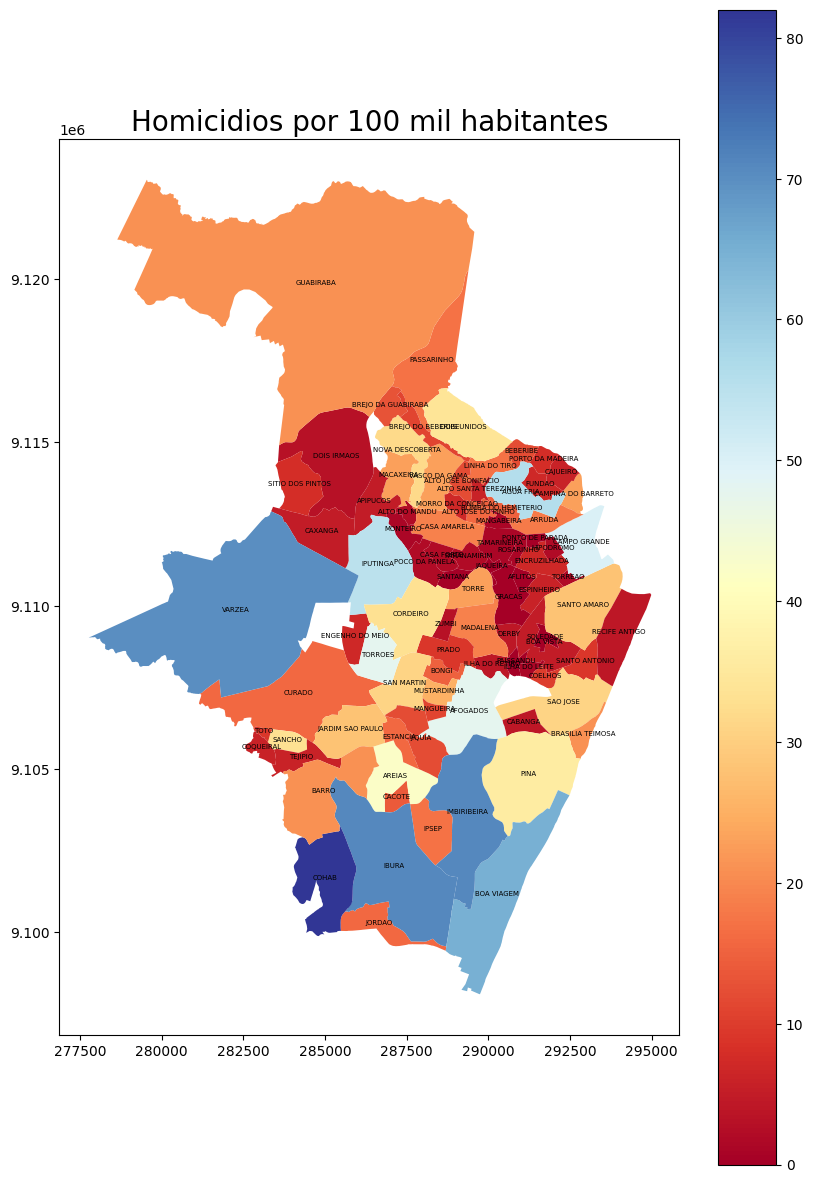

In [ ]:


variavel = 'homicidios'
rec["var_100k"] = (rec[variavel]/rec['pop2010'])*100000



rec.plot(variavel, figsize = (10,15), legend = True,cmap='RdYlBu' ) # Plot valor bruto
plt.title("Homicidios por 100 mil habitantes", size = 20)
for idx, row in rec.iterrows():
    plt.annotate(text=row['BAIRRO'], xy=row['geometry'].centroid.coords[0], fontsize=5, ha='center')
plt.show()


In [ ]:
df_teste = rec[[variavel, "BAIRRO","var_100k"]]
df_teste.head()

,homicidios,BAIRRO,var_100k
0,17,PASSARINHO,83.723221
1,0,AFLITOS,0.000000
2,16,ALTO JOSE DO PINHO,129.722718
3,1,MANGABEIRA,14.388489
4,2,ALTO DO MANDU,42.964554


<Axes: >

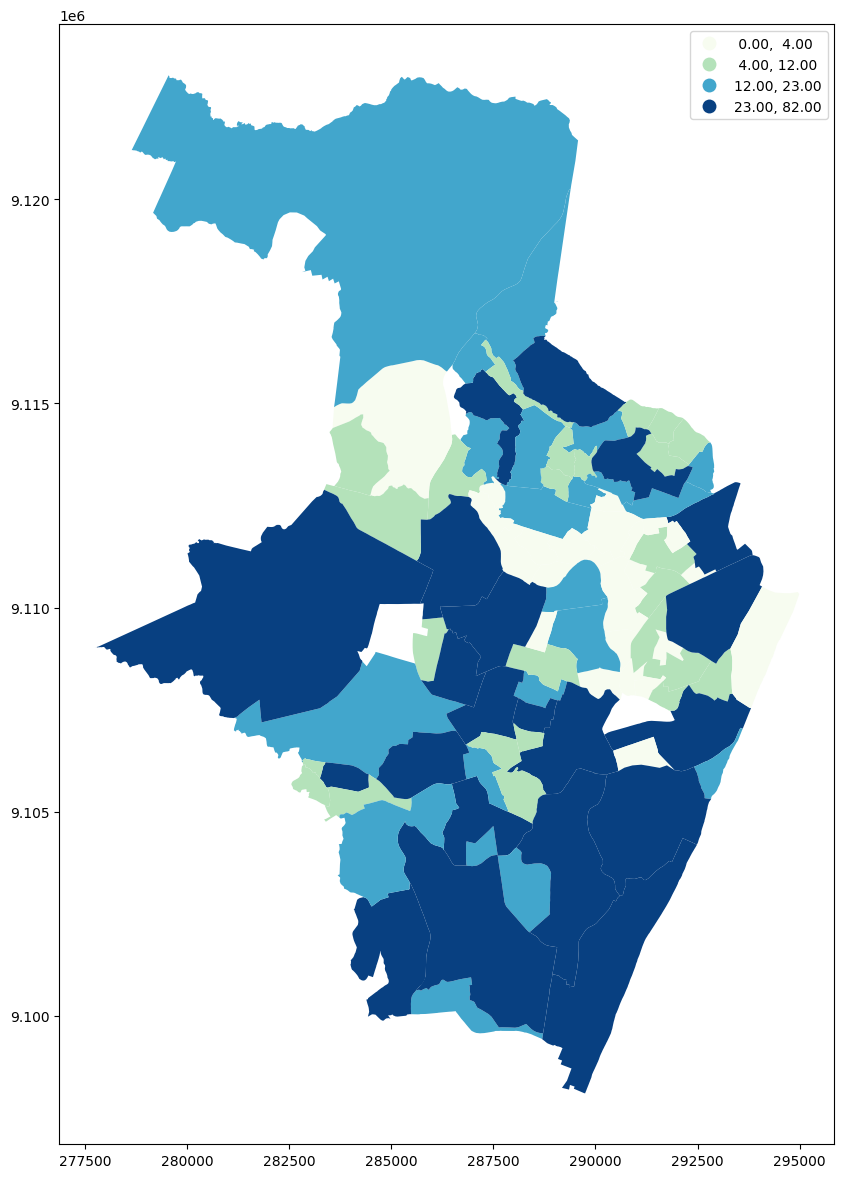

In [ ]:
rec.plot(variavel, figsize = (10,15), legend = True, scheme= 'quantiles', k = 4, cmap = "GnBu") # Plot valor bruto

# Correlações Entre Variáveis


In [ ]:
df.columns

Index(['idrec', 'OBJECTID', 'BAIRRO', 'KM2', 'homicidios', 'teste',
       'roubo_veiculo', 'roubo_patrimonio', 'pop2000', 'pop2010', 'dens2010m2',
       'gini', 'p_pobre', 'p_desocup', 'p_alf', 'p_ens_sup',
       'p_mulherchefe15_25', 'p_mulher_chefe', 'pjovem15_18', 'pjovem15_25',
       'pjovem13_25', 'pjovem18_25', 'rdb', 'km2', 'centro', 'preco_imovel'],
      dtype='object')

In [ ]:
## Averiguando Correlação entre variáveis
df_teste = df.copy()

In [ ]:
df_teste.drop(columns= ["BAIRRO","idrec","OBJECTID", "pop2000","pop2010"])

,KM2,homicidios,teste,roubo_veiculo,roubo_patrimonio,dens2010m2,gini,p_pobre,p_desocup,p_alf,...,p_mulherchefe15_25,p_mulher_chefe,pjovem15_18,pjovem15_25,pjovem13_25,pjovem18_25,rdb,km2,centro,preco_imovel
0,0.302431,0,0,86,490,19.088699,0.347966,0.016154,12.6428,78.877296,...,4.3588,41.232101,8.0100,21.357800,25.131399,15.542500,12347.520,0.302431,0,1.000000
1,3.780119,48,0,293,1681,9.593610,0.518413,0.144401,1.6154,93.336403,...,2.8103,32.846199,7.9539,20.972200,24.349600,15.244200,18549.840,3.780120,0,1.097023
2,1.941672,56,0,103,593,22.418301,0.430899,0.133028,10.9633,74.209503,...,4.3240,40.100899,8.0259,22.010500,25.879101,16.165400,14279.041,1.941670,0,1.047493
3,0.263155,2,0,4,44,17.689199,0.463614,0.116262,10.5224,83.159798,...,2.5594,40.250198,7.0937,19.886000,23.462400,14.698400,27879.359,0.263155,0,1.823942
4,0.563095,12,0,12,91,22.131300,0.371638,0.140252,11.6048,73.701202,...,4.3550,40.351501,8.4996,23.099300,27.316799,16.926600,10905.120,0.563095,0,1.356625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.652515,48,0,147,307,19.373501,0.449736,0.174874,15.2503,75.113503,...,6.6179,37.307301,8.7631,22.897301,27.282301,16.299601,13803.721,1.652520,0,1.127497
85,0.131736,9,0,28,88,18.370001,0.461798,0.153078,14.1431,79.072800,...,4.0541,36.938400,7.1523,19.293600,23.576200,13.951400,15552.601,0.131736,0,3.067921
86,22.942852,70,0,356,1078,3.070800,0.536825,0.143599,12.8135,79.447197,...,5.1913,33.239799,8.2279,22.202101,26.153299,16.183001,24591.961,22.942900,0,1.531121
87,1.620080,23,0,61,336,19.150299,0.405266,0.114379,9.7303,76.388199,...,3.3557,34.327099,8.0813,21.593100,25.484301,15.615400,13990.801,1.620080,0,1.196021


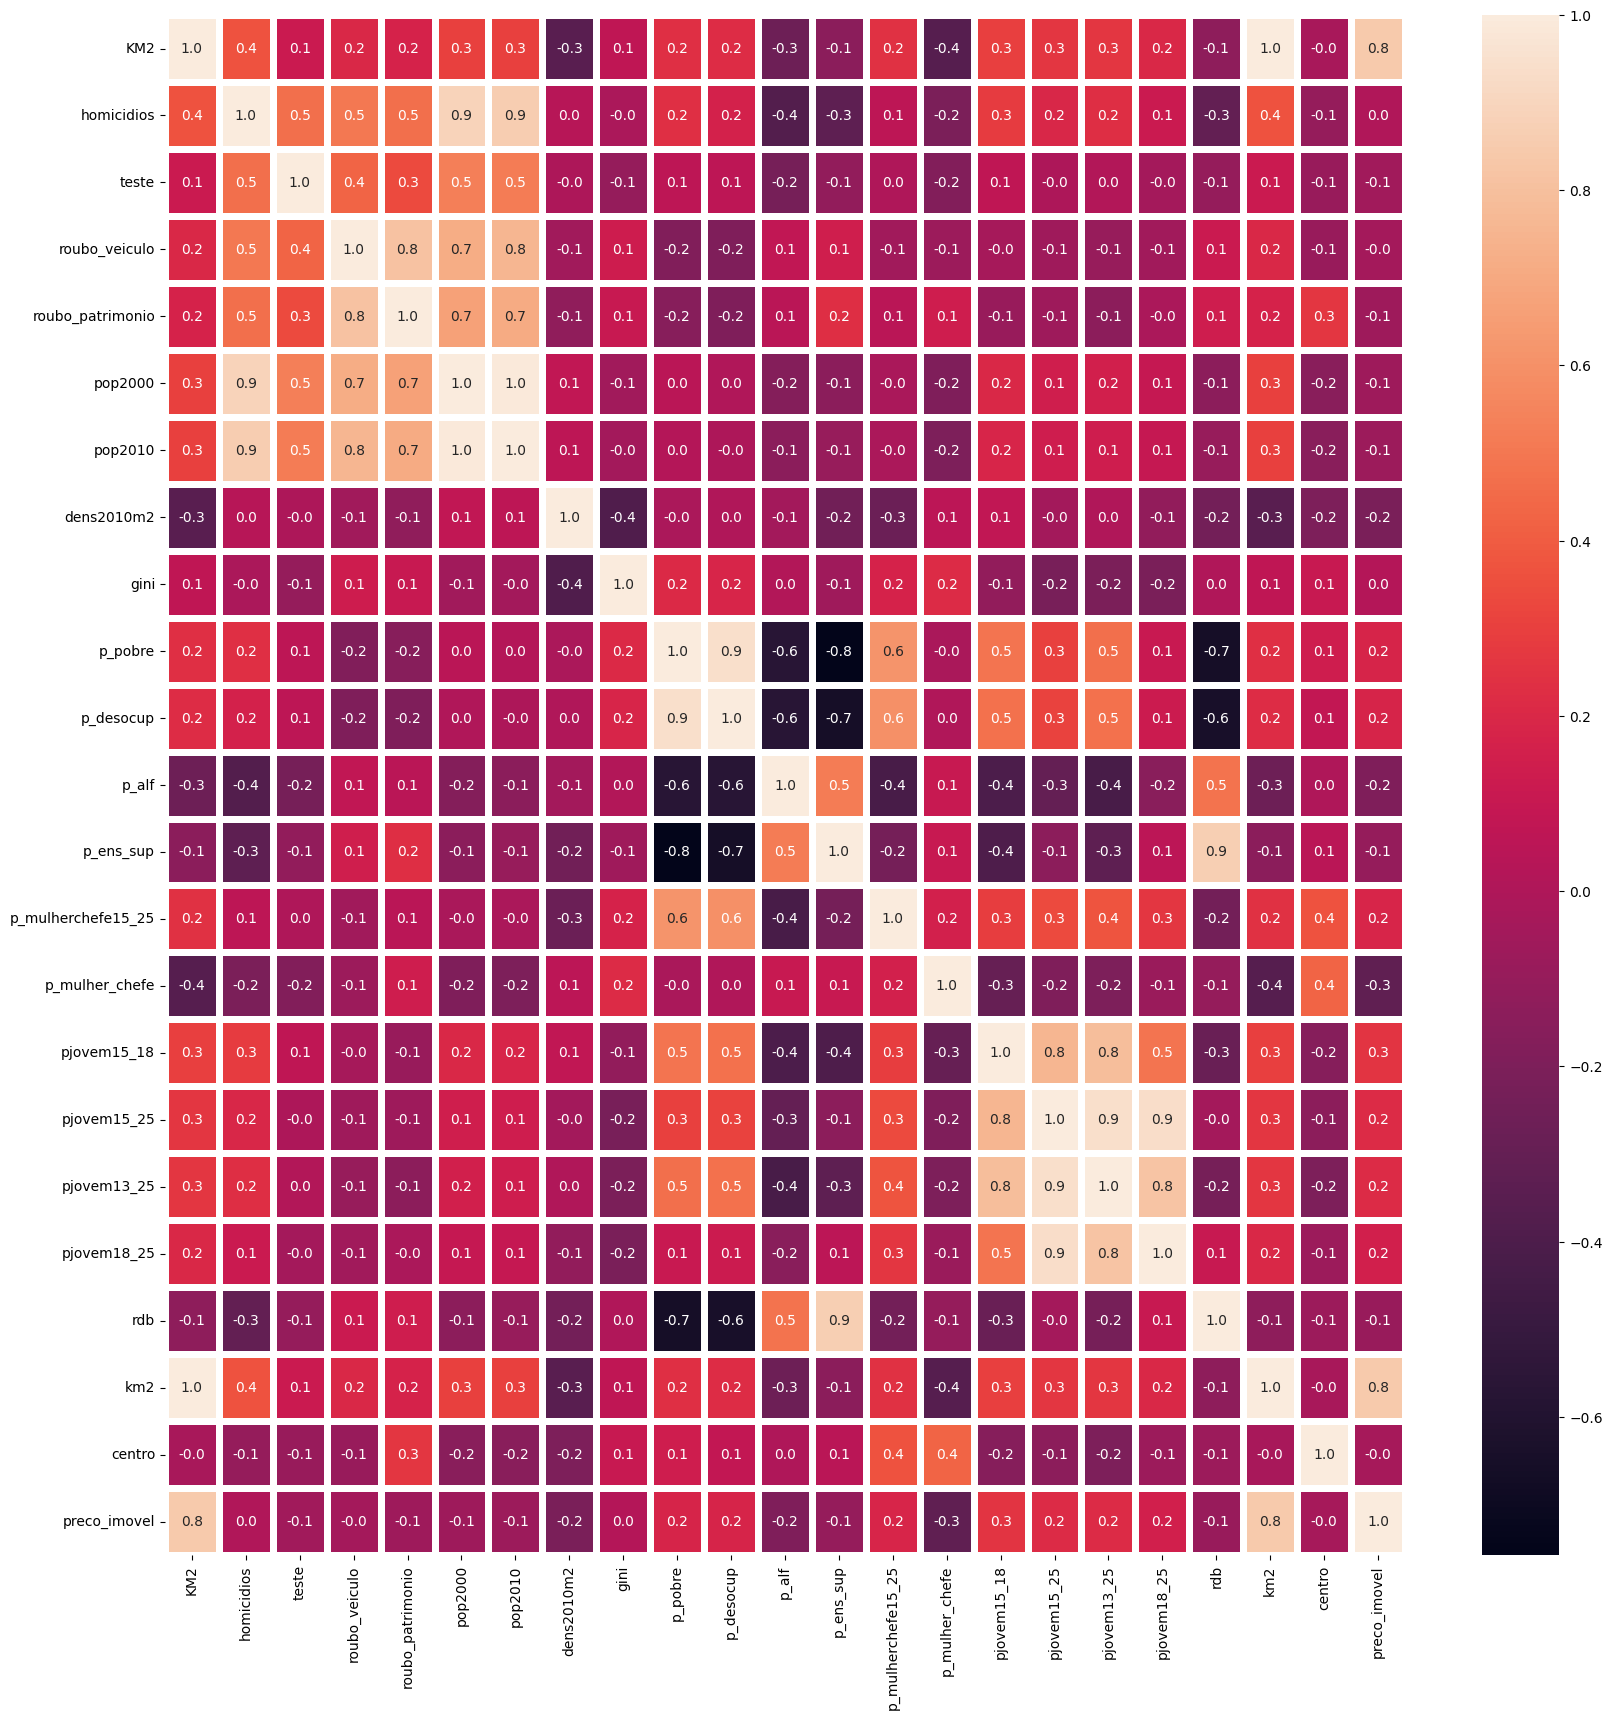

In [ ]:
df_teste = df_teste.drop(columns= ["BAIRRO","idrec","OBJECTID"])
correlation = df_teste.corr()
# plot da matriz de correlação



fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=5)
plot
plt.savefig('Matriz de Correlacao entre variaveis.jpeg',)

## Altos índices de correlação


*   (p_pobre e p_desocup )com  rdb de *negativamente*

---


*   Todas as variáveis de idade estão fortemente correlacionadas {pjovem _15_18; pjovem 15_25; pjovem 18_25) *Positivamente*
* p_ens_sup altamente correlacionada com p_pobre e p_desocupado e rdb *negatiamente*
* km2 altamente correlacionada com preco_imovel *positivamente*
* p_alf com correlacao forte com rdb *Positivamente*





# Montando Regressão - Teste 1

In [ ]:
rec['RVec_100k'] = rec['roubo_veiculo']/rec['pop2010']

In [ ]:
import libpysal

In [ ]:

w = libpysal.weights.DistanceBand.from_dataframe(rec[['geometry']], threshold=5000, binary=False)
w.transform = 'r'


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_data.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


In [ ]:
teste = pd.DataFrame(w)
teste.head()

,0,1
0,0,"{2: 0.039913701768235915, 4: 0.041244819399808..."
1,1,"{2: 0.015846087859674996, 3: 0.020156256590753..."
2,2,"{0: 0.007783473866147299, 1: 0.015779132910097..."
3,3,"{1: 0.01949718931166408, 2: 0.0554628326453569..."
4,4,"{0: 0.010777143454306382, 1: 0.012602870438915..."


In [ ]:
y = rec[variavel].values
moran = Moran(y,w)
moran.I

0.15207379186533548

/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.15', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.15)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

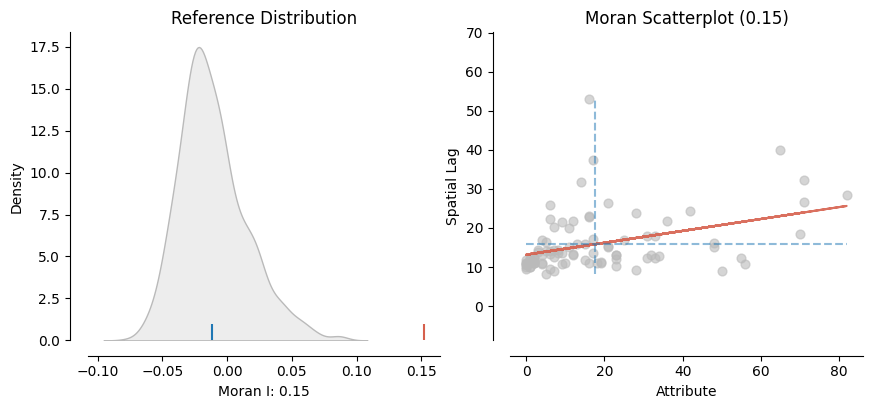

In [ ]:
plot_moran(moran,zstandard = False, figsize=(10,4))

Moran's inclinados positivamente implicando autocorrelação espacial positiva entre as regiões para o roubo de veículos.

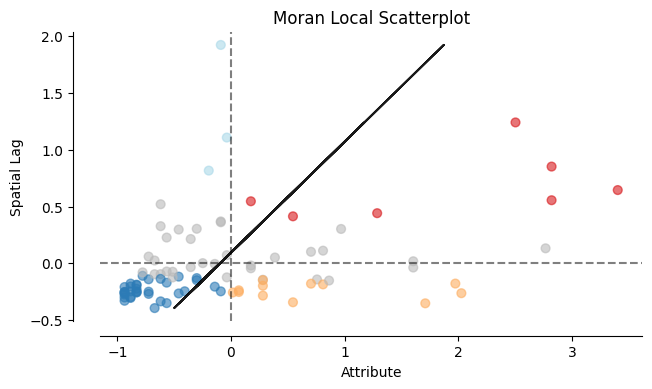

In [ ]:
moran_loc = Moran_Local(y, w)
moran_scatterplot(moran_loc, p=0.05);

Analisando Clusterização dos indicadores de autocorrelação.
Entende-se que as regiões censitárias com maior índice de roubos de veículos, acompanhados de vizinhos com altos índices de roubos de veículos, chamadas regiões High-High (HH) se concentram na região central do Recife.

Fenomenos interessantes estão nas regiões ao norte que possuem na região em laranja altos índices de roubos acompanhados de seus vizinhos com baixos níveis desse indicador.

(<Figure size 900x900 with 1 Axes>, <Axes: >)

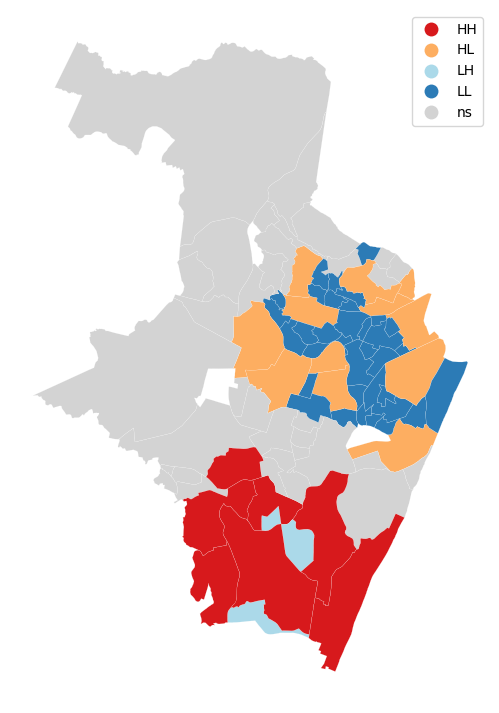

In [ ]:
lisa_cluster(moran_loc, rec, p=0.05, figsize = (9,9))

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

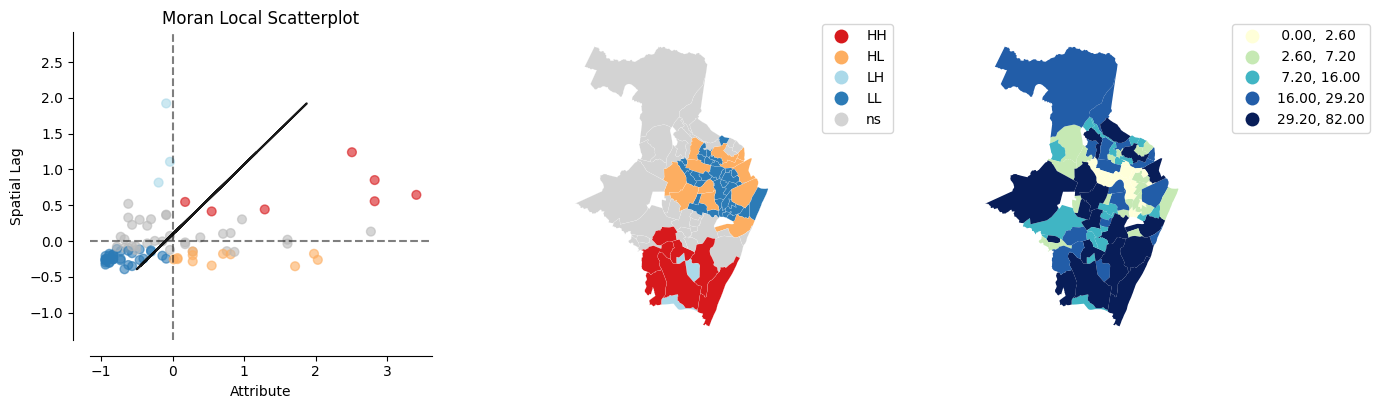

In [ ]:
plot_local_autocorrelation(moran_loc, rec, variavel)

In [ ]:
#m1 = spreg.OLS()